In [47]:
#this code will be very similar to my other set of cop analysis code

#this code will calculate the estimated cop of geothermal test wells on princeton's campus
#the Q_in of this program will be the amount of heat provided by the total steam used by campus
#for the whole year of 2019
import sys
sys.path
import pandas as pd
import numpy as np

In [48]:
#first Q will be calculated by pulling the data from the campus-2019 csv files
#this will be done by creating an array which stores the data from the Plant.i.Campus_STMF_kpph column
#and in turn pulling data from each campus energy csv for months 1 through 12 for the array

steam_tot_phour=[]
for k in range(1,13):
    df_campus = pd.read_csv ("/Users/tajjahnae/chaos_project/campus-2019-" + str(k) + ".csv")
    for i in range(1,len(df_campus.index)):
        if(df_campus.iat[i,10]!='None'):
            steam_tot_phour.append(df_campus.iat[i,10])
            
for i in range(len(steam_tot_phour)):
    steam_tot_phour[i]=float(steam_tot_phour[i])
    
Q=sum(steam_tot_phour)
print(Q)

613801.1183643142


In [49]:
#convert Q from kpph to kw
#according to tiger energy 200,000 kpph of steam is approx 237,000,000 BTU/hr which can then be converted
# to 69457.836163 kw. 
Q_kw=(Q*69457.836163)/(200000)
#convert Q_kw to GWh since there are 8760 hours in a year
Q_gwh=(Q_kw*8760)*(0.0000010)
print(Q_gwh)

1867.3384312014443


In [50]:
#let's calculate the ideal cop of heating using carnot efficiency=T_h/(T_h-T_c) where T_h is the hot temp
#being pumped into the well and T_c is the cold temp being extracted from the geo well 

#the input T_h is in farenheight. convert to celsius and then to kelvin
T_h=150 
T_h=(T_h-32)*5/9
T_h=T_h+273.15

#from the pre trt test tempertatures taken of a well in princeton T_c can be estimated to around 57 degrees
#farienheight. this input can be changed. repeat the same process to convert to kelvin
T_c=57
T_c=(T_c-32)*5/9
T_c=T_c+273.15

#calculate the ideal cop
cop_ideal=T_h/(T_h-T_c)

In [51]:
#the efficiecy of a heat pump can be estimated to be between 50% and 60%
#g_eff will store efficiences in the above range
#calculate the real cop by accounting for the efficiency of the heat pump

g_eff=range(50,61)
cop_real=[]
for i in g_eff:
    cop_real.append((i/100)*cop_ideal)

In [66]:
#since Q is known the heat pump electricity (hp_elec) can be calculated by using the cop_real
hp_elec=[]
for i in range(len(cop_real)):
    hp_elec.append(Q_gwh/cop_real[i])

In [65]:
#let's make a second scenario to compare to the above prediction of T_h and T_c
#the same math will be done to obtain a set of hp_elec for the second scenario

T_h2=150 
T_h2=(T_h2-32)*5/9
T_h2=T_h2+273.15

T_c2=80
T_c2=(T_c2-32)*5/9
T_c2=T_c2+273.15

cop_ideal2=T_h2/(T_h2-T_c2)

g_eff2=range(50,61)
cop_real2=[]
for i in g_eff:
    cop_real2.append((i/100)*cop_ideal2)
    
hp_elec2=[]
for i in range(len(cop_real2)):
    hp_elec2.append(Q_gwh/cop_real2[i])

In [68]:
#calculate the difference between hp_elec and hp_elec2
diff=[]
for i in range(len(hp_elec)):
    diff.append(hp_elec[i]-hp_elec2[i])

In [64]:
#from the difference the cost benefit data can be calculated with the price of elec in $/kwh which will
#then be converted to $/gwh. according to electricitylocal.com the average residential electricity rate 
#in Princeton is 14.88¢/kWh or 0.1488$/kwh

elec_cost_dollar_pkWh=0.1488
cost_diff=[]
for i in range(len(diff)):
    cost_diff.append((diff[i]*(1000000))*elec_cost_dollar_pkWh)

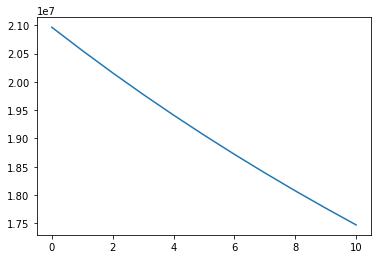

In [71]:
import matplotlib.pyplot as plt
plt.plot(cost_diff)